In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:12<00:00, 39.3MB/s]
100% 1.06G/1.06G [00:12<00:00, 95.1MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#Generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
#Creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 106ms/step - loss: 1.1616 - accuracy: 0.5799 - val_loss: 0.6180 - val_accuracy: 0.6546
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5959 - accuracy: 0.6891 - val_loss: 0.5349 - val_accuracy: 0.7290
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5004 - accuracy: 0.7590 - val_loss: 0.5123 - val_accuracy: 0.7416
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4327 - accuracy: 0.7997 - val_loss: 0.4575 - val_accuracy: 0.7846
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3652 - accuracy: 0.8381 - val_loss: 0.4221 - val_accuracy: 0.8080
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3111 - accuracy: 0.8663 - val_loss: 0.4801 - val_accuracy: 0.8040
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2383 - accuracy: 0.8989 - val_loss: 0.4445 - val_ac

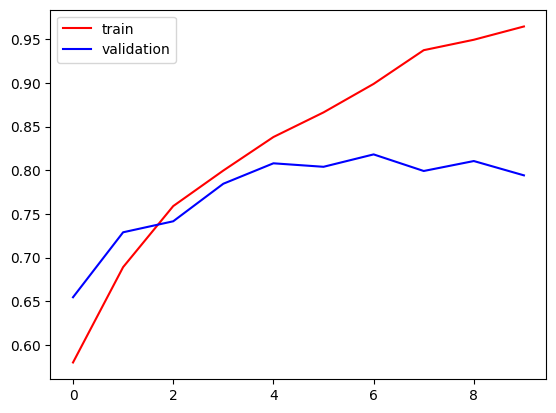

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

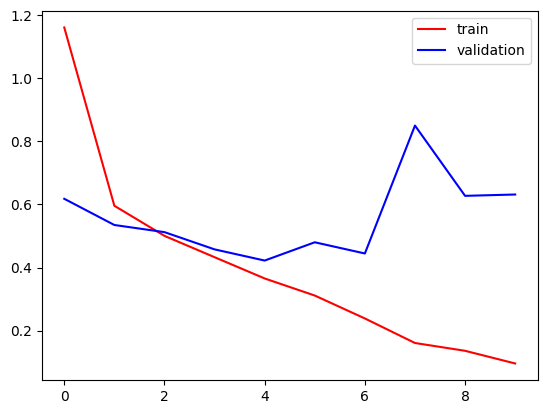

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#way to reducing overfitting

#add more data
#Data Augmentation
#L1/L2 Regularization
#Dropout
#Batch Norm
#Reduce Complexity

In [32]:
import cv2

In [40]:
test_img = cv2.imread('/content/cat.jpg')

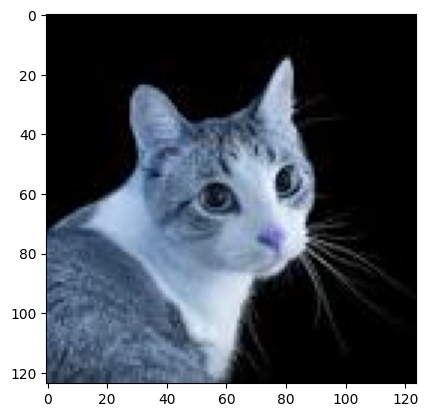

In [41]:
plt.imshow(test_img)

In [42]:
test_img.shape

(124, 124, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)